In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

# Demo introducing Color Refinement and Nest on undirected graphs

## A simple graph
Lets start with a simple undirected graph on four nodes and two edges connecting separated pairs of nodes.

In [2]:
G = nx.Graph()
G.add_nodes_from(range(4))
G.add_edges_from([(0,2), (1,3)])

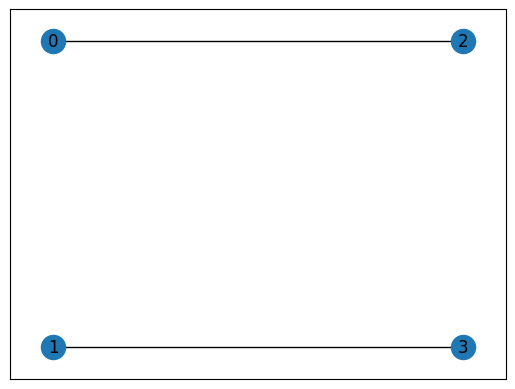

In [3]:
pos= {0:(0,0), 1:(0,-1), 2:(1,0), 3:(1,-1)}
nx.draw_networkx(G, pos = pos)

### Rewiring a graph

Given a graph `G` (here a networkx graph, we can rewire this graph using the `rewire_graph` function

In [4]:
from nestmodel import rewire_graph

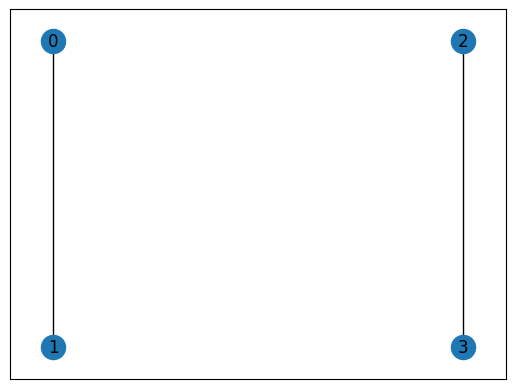

In [5]:
new_graph = rewire_graph(G, r=1, seed=2).to_nx()
nx.draw_networkx(new_graph, pos = pos)

Using the same seed will always yield the same rewired graph

## A more elaborate graph

Let us start with a more elaborate graph and visualize the WL colors of those graphs

In [6]:
# import visualization function useful for visualizing small graphs and their wl colors
from nestmodel.visualization import draw_network_with_colors

In [7]:
# nice positions of the labels
pos = {
    0:[-1.5,-0.7],
    1:[0,-1],
    2:[-1.5,0.7],
    3:[-0.5,0],
    4:[1.5,-0.4],
    5:[0,1],
    6:[1.5,0.4],
}

In [8]:
G = nx.Graph()
G.add_nodes_from(range(7))
G.add_edges_from([(2,5), (5,6), (6,4), (0,1), (1,4), (2,3), (0,3), (2,4), (0,6)])

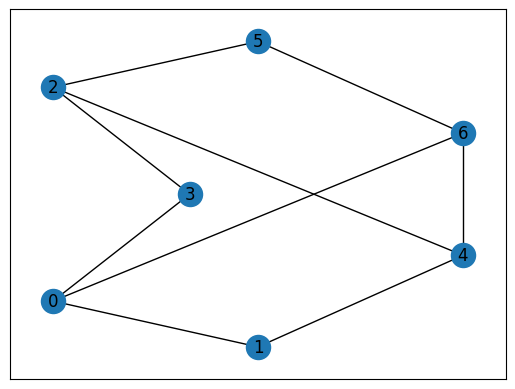

In [9]:
nx.draw_networkx(G, pos=pos)

In [10]:
# difference in colors from same parent
# higher values will result in more distinc colors of the children
strength=100

## Visualize the graph and it's WL colors

We can use the `draw_network_with_colors` function to plot a graph colored with different colorings obtained from the WL/color refinement algorithm. We can choose the rounds by specifying the `depth` parameter.

### depth = 0

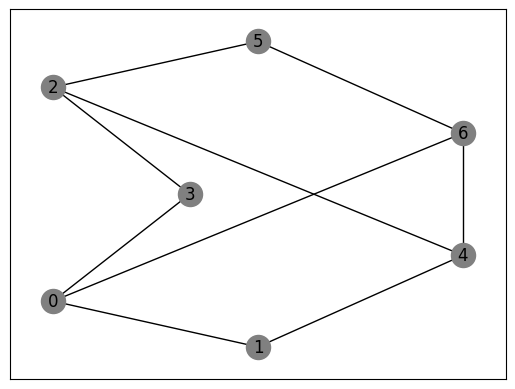

In [11]:
draw_network_with_colors(G, depth=0, pos=pos, strength=strength)

As we have not specified a different initial coloring the graph, all nodes have the same color

### depth = 1

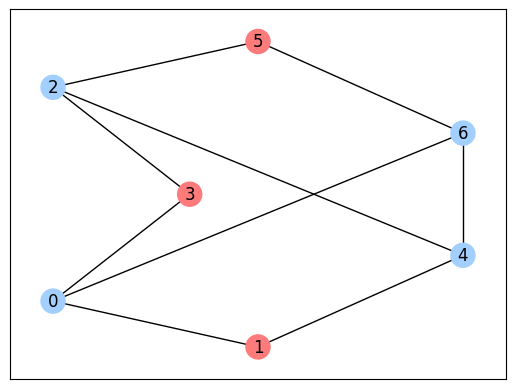

In [12]:
draw_network_with_colors(G, depth=1, pos=pos, strength=strength)

At depth 1 two colors are necessary to color the graph. The three center nodes have degree two and thus obtain the color red, while the the four outer nodes have degree three and they are colored blue.

### depth = 2

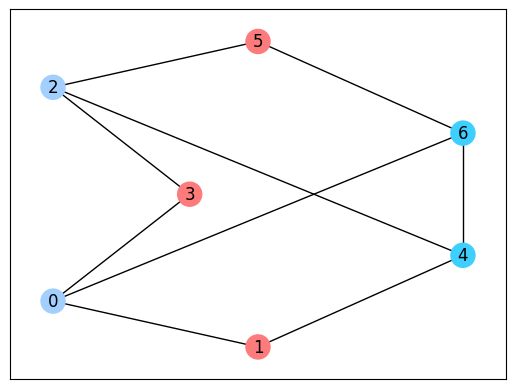

In [13]:
draw_network_with_colors(G, depth=2, pos=pos, strength=strength)

at round two the four outer nodes are further distinguished, the left two nodes had two red and one blue neighbor while the blue nodes on the right have two blue and one red neighbor.

### depth = 3

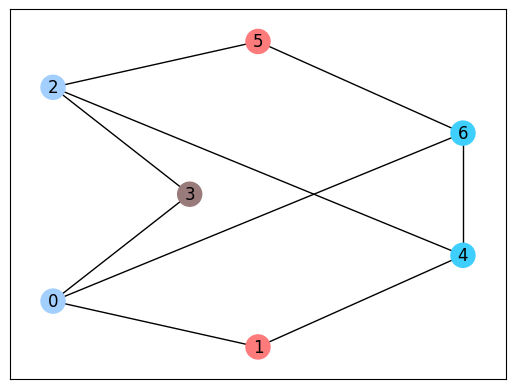

In [14]:
draw_network_with_colors(G, depth=3, pos=pos, strength=strength)

lastly we only distinguish node three from the other two red nodes. This happens because node three hase two light blue neighbors, while the neighbors of node 5 and 1 are ob both shades of blue

## Rewiring the more elaborate graph

Lets us now rewire the more elaborate graph at different depths and see what the resulting colorings are:


Rewiring with depth 0 colors, the resulting graph are identically colord at depth <=1


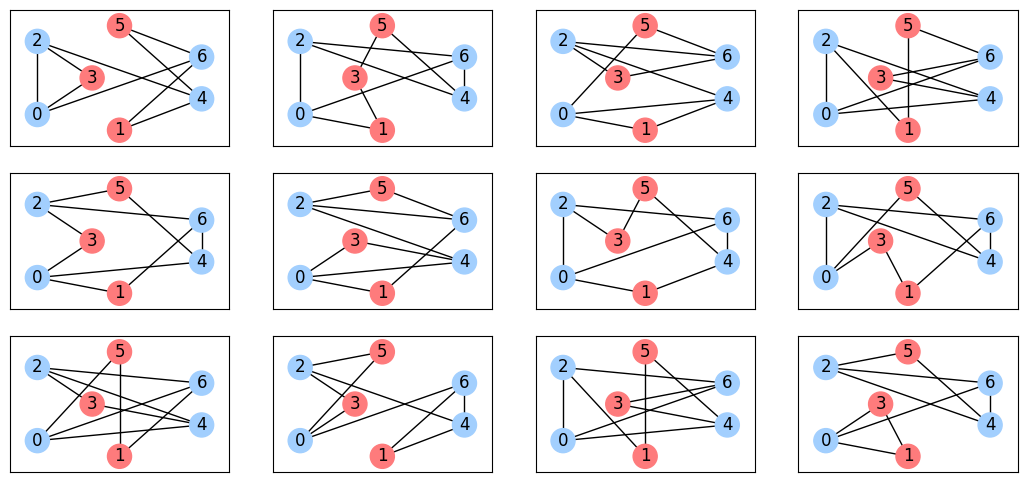



Rewiring with depth 1 colors, the resulting graph are identically colord at depth <=2


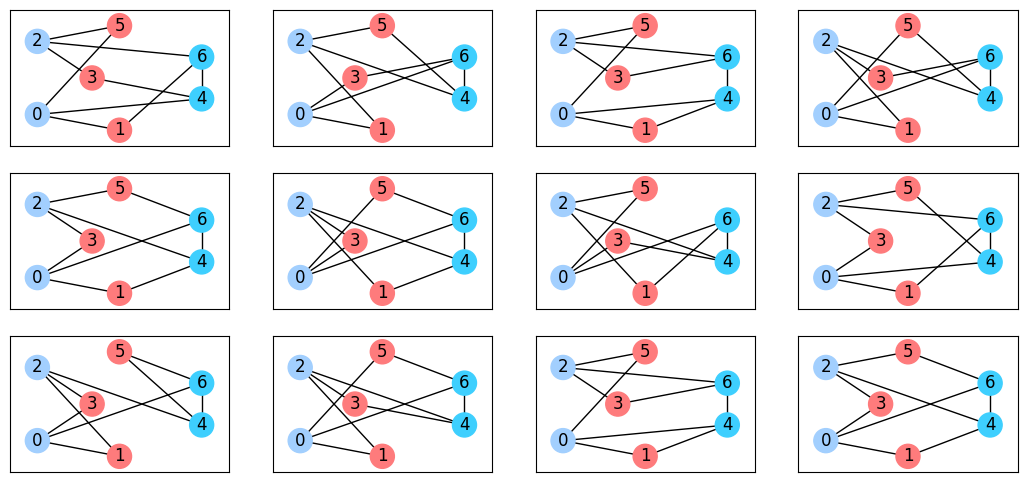



Rewiring with depth 2 colors, the resulting graph are identically colord at depth <=3


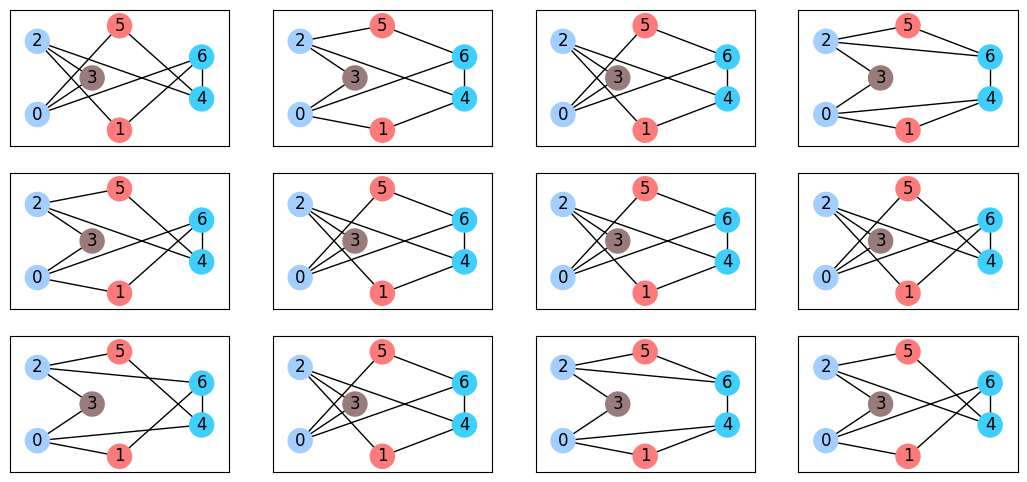



Using the stable colors does not change the coloring of generated graphs
We are now only generating three(?) graphs (using the stable colors of this graph)


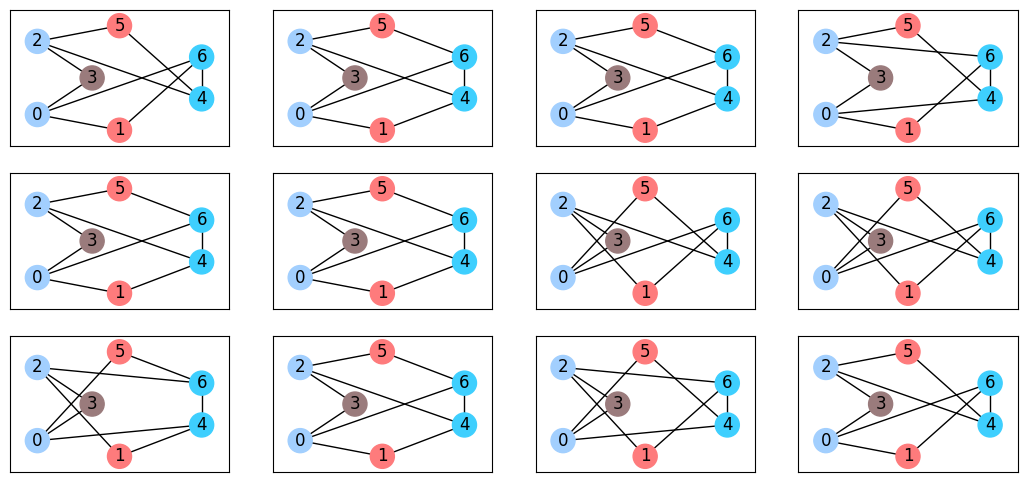

In [15]:
for depth in range(4):
    fig, axs = plt.subplots(3,4, figsize=(13,6))
    axs=axs.ravel()
    if depth!=3:
        print(f"Rewiring with depth {depth} colors, the resulting graph are identically colord at depth <={depth+1}")
    else:
        print("Using the stable colors does not change the coloring of generated graphs")
        print("We are now only generating three(?) graphs (using the stable colors of this graph)")
    for seed in range(12):
        ax = axs[seed]
        
        
        
        # rewire the graph
        G_rewired = rewire_graph(G, depth=depth, r=2, seed=seed).to_nx()
        
        
        
        # plot the graph
        plt.sca(ax)
        draw_network_with_colors(G_rewired, depth=depth+1, pos=pos, strength=strength)
        ax.set_xlim(-2,2)
        ax.set_ylim(-1.3,1.3)
    plt.show()
    print()
    print()